# Basic statistics -- using Fandango movie rating data

### Read in the movie review data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
movies = pd.read_csv("datasets/fandango_score_comparison.csv")

# Color Blind 10 colors with RGB values
cb_dark_blue = (0/255.0, 107/255.0, 164/255.0)
cb_orange = (255/255.0, 128/255.0, 14/255.0)
cb_black = (89/255.0, 89/255.0, 89/255.0)

# Create histograms of metacritic and fandango ratings

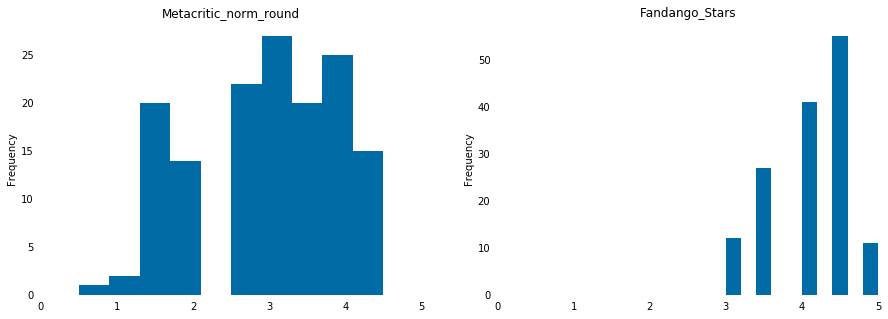

In [2]:
fig = plt.figure(figsize=(15,5))

for i, col_name in enumerate(['Metacritic_norm_round', 'Fandango_Stars']):
    ax = fig.add_subplot(1,2,i+1)
    ax.hist(movies[col_name], bins = 10, color = cb_dark_blue)
    ax.set_xlim(0,5)
    ax.set_title(col_name)
    ax.set_ylabel('Frequency')

    # Remove ticks and spines
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    for key, val in ax.spines.items():
        ax.spines[key].set_visible(False)    

plt.show()

### As we can see that the Fandango score reviews are concentrated in the region between 3 and 5, which imply that the Fandango reviews may be biased

# Mean, median and standatd deviations

In [3]:
mean_fg = np.mean(movies["Fandango_Stars"])
mean_mc = np.mean(movies["Metacritic_norm_round"])

median_fg = np.median(movies["Fandango_Stars"])
median_mc = np.median(movies["Metacritic_norm_round"])

std_fg = np.std(movies["Fandango_Stars"])
std_mc = np.std(movies["Metacritic_norm_round"])

# Scatter plots to check correlation between Fandango and Metacritic scores

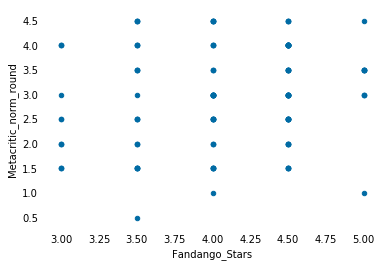

In [4]:
ax = movies.plot(kind = 'scatter', x = 'Fandango_Stars', y = 'Metacritic_norm_round', color = cb_dark_blue)

# Remove ticks
plt.tick_params(bottom="off", top="off", left="off", right="off")

# Remove spines
for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)
    
plt.show()

### From the above plot we observe that for any score in Fandango (3, 3.5, 4.0, 4.5, 5.0), there is wide range of rating in Metacritic (for example spans from 0.5 to 4.5 for Fandango score of 3.5)
### Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa
### Let's explore this

In [5]:
# Compute difference in ratings of Fandango and Metacritic
movies['fm_diff'] = movies['Fandango_Stars'] - movies['Metacritic_norm_round']
movies['fm_diff'] = np.absolute(movies['fm_diff'])

# Get movies with largest difference in ratings
movies.sort_values('fm_diff', inplace = True, ascending = False)
print('Movies with largest difference in Fandango and Metacritic reviews')
movies[['FILM', 'fm_diff']].head()

Movies with largest difference in Fandango and Metacritic reviews


,FILM,fm_diff
3,Do You Believe? (2015),4.0
85,Little Boy (2015),3.0
47,Annie (2014),3.0
19,Pixels (2015),3.0
134,The Longest Ride (2015),3.0


# Correlations between Fandango and Metacritic scores

In [6]:
from scipy import stats

corr_fm, p_val_fm = stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print("Correlation coefficient: {0:.2f}".format(corr_fm))

Correlation coefficient: 0.18


### The correlation between Fandango and Metacritic scores is very low. It implies that although the Fandango scores seems biased, they are not completely negatively correlated to Metacritic scores. 

# Fit linear regression model

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = movies['Metacritic_norm_round'], y = movies['Fandango_Stars'])

print("slope: {0:.2f}".format(slope))
print("intercept: {0:.2f}".format(intercept))
print("r_value: {0:.2f}".format(r_value))
print("p_value: {0:.2f}".format(p_value))
print("std_err: {0:.2f}".format(std_err))

# Example prediction of Metacritic 3.0 rating movie in Fandango scale
predict_3 = slope * 3.0 + intercept
print("Prediction: Metacritic 3.0 -- Fandango {0:.1f}".format(predict_3))

slope: 0.10
intercept: 3.80
r_value: 0.18
p_value: 0.03
std_err: 0.04
Prediction: Metacritic 3.0 -- Fandango 4.1


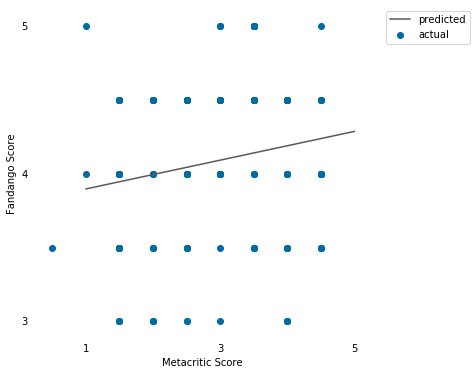

In [8]:
predict_1 = slope * 1.0 + intercept
predict_5 = slope * 5.0 + intercept

x = [1.0, 5.0]
y = [predict_1, predict_5]

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y, color = cb_black, label = 'predicted')
ax.scatter(x = movies['Metacritic_norm_round'], y = movies['Fandango_Stars'], color = cb_dark_blue, label = 'actual')

ax.set_xticks([1, 3, 5])
ax.set_yticks([3, 4, 5])

ax.set_xlabel('Metacritic Score')
ax.set_ylabel('Fandango Score')

# Remove ticks
ax.tick_params(bottom="off", top="off", left="off", right="off")

# Remove spines
for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)
   
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left', borderaxespad=0.)
plt.show()